# İbrahim Bancar – 150220313  
## Final Take-Home Part 

In [649]:
# Basic imports
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Custom models from src
from src.svm import SVM
from src.MultLayerPerceptron import MultiLayerPerceptron

### Data Generation  
Two synthetic datasets are generated for the experiments.  
- **D1**: Linearly separable data is created using the `make_blobs` function.  
- **D2**: Non-linearly separable data is created using the `make_moons` function.  

Each dataset consists of two classes, with 100 samples per class.

In [650]:
def generate_perfect_datasets():
    """
    Generates two clean synthetic datasets:
    - D1: Linearly separable (make_blobs)
    - D2: Non-linearly separable (make_moons)
    
    Both are split into training and test sets.

    Returns:
        dict: Dictionary with keys: D1, D2, T1, T2
    """
    datasets = {}

    # D1: Perfectly linearly separable using blobs
    X1, y1 = make_blobs(
        n_samples=200,
        centers=2,
        cluster_std=1.25,
        random_state=42
    )

    # Split D1 into train and test
    X1_train, X1_test, y1_train, y1_test = train_test_split(
        X1, y1, test_size=0.1, stratify=y1, random_state=42
    )

    datasets["D1"] = (X1_train, y1_train)
    datasets["T1"] = (X1_test, y1_test)

    # D2: Non-linearly separable using make_moons
    from sklearn.datasets import make_moons
    X2, y2 = make_moons(
        n_samples=200,
        noise=0.2,
        random_state=42
    )

    # Split D2 into train and test
    X2_train, X2_test, y2_train, y2_test = train_test_split(
        X2, y2, test_size=0.1, stratify=y2, random_state=42
    )

    datasets["D2"] = (X2_train, y2_train)
    datasets["T2"] = (X2_test, y2_test)

    return datasets

# Generate and store the datasets
datasets = generate_perfect_datasets()

### Data Visualization  
The generated datasets are visualized using scatter plots.  
- The plot for **D1** shows linearly separable classes in distinct regions.  
- The plot for **D2** illustrates non-linearly separable classes with overlapping structures.  

Different colors are used to indicate class membership in each plot.

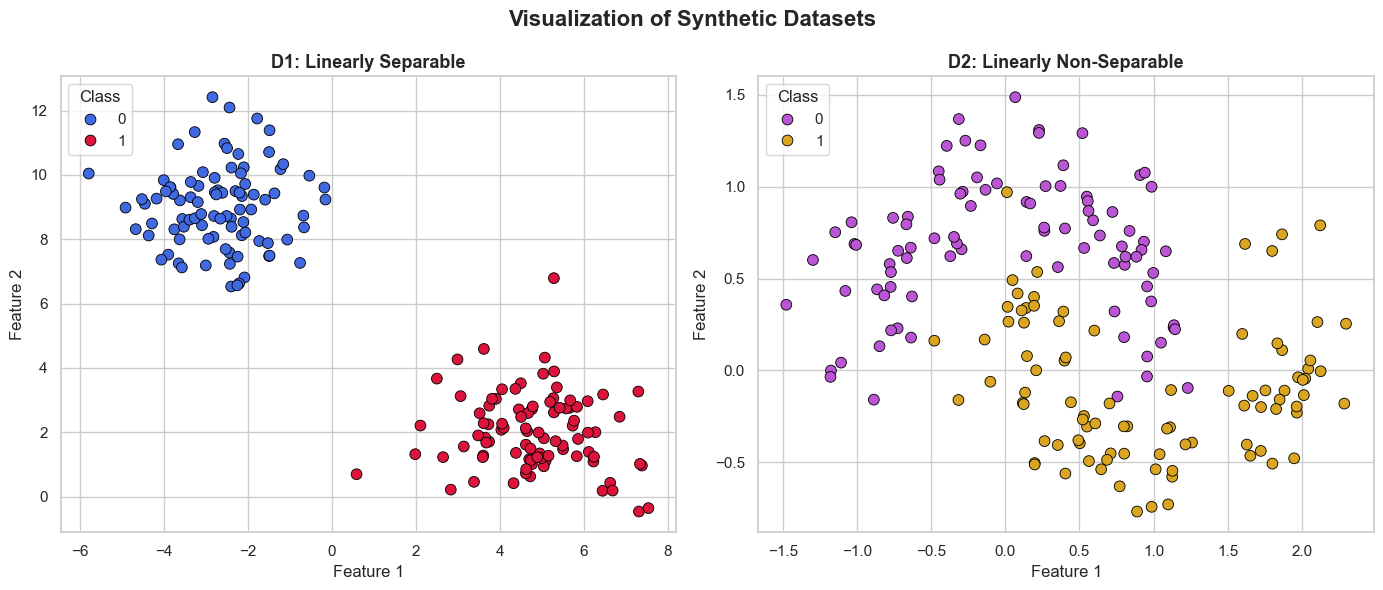

In [651]:
def plot_datasets(datasets):
    """
    Plots the D1 and D2 datasets side-by-side using Seaborn for class separation visualization.

    Parameters
    ----------
    datasets : dict
        Dictionary returned from `generate_perfect_datasets()` containing keys:
        "D1", "D2" → training data (X, y)
    """
    X1, y1 = datasets["D1"]
    X2, y2 = datasets["D2"]

    # Create a 1x2 subplot
    plt.figure(figsize=(14, 6))
    sns.set_style("whitegrid")

    # === Plot for D1 ===
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        x=X1[:, 0], y=X1[:, 1], hue=y1,
        palette={0: 'royalblue', 1: 'crimson'},
        s=60, edgecolor='black'
    )
    plt.title("D1: Linearly Separable", fontsize=13, weight='bold')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Class", loc='upper left')

    # === Plot for D2 ===
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        x=X2[:, 0], y=X2[:, 1], hue=y2,
        palette={0: 'mediumorchid', 1: 'goldenrod'},
        s=60, edgecolor='black'
    )
    plt.title("D2: Linearly Non-Separable", fontsize=13, weight='bold')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(title="Class", loc='upper left')

    # Overall title and layout adjustment
    plt.suptitle("Visualization of Synthetic Datasets", fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

# Display dataset visualizations
plot_datasets(datasets)


### Hard-Margin SVM Classification on Linearly Separable Data (D1)

In this section, a custom implementation of a hard-margin Support Vector Machine (SVM) is used to classify a linearly separable dataset, D1.  
Since the SVM implementation operates on binary labels of -1 and 1, the original labels are converted accordingly.  
The model is trained on D1 and evaluated on T1 (the corresponding test set). The accuracy score is reported.

In [652]:
# Retrieve the D1 training and T1 test data
X1_train, y1_train = datasets["D1"]
X1_test, y1_test = datasets["T1"]

# Convert labels from {0, 1} to {-1, 1} for compatibility with SVM
y1_train_svm = np.where(y1_train == 0, -1, 1)
y1_test_svm = np.where(y1_test == 0, -1, 1)

# Initialize SVM with a large C value to simulate hard-margin behavior
model = SVM(C=1e5, random_state=42)

# Train the model on the training set
model.fit(X1_train, y1_train_svm)

# Predict labels for the test set
y_pred = model.predict(X1_test)

# Compute and print accuracy score
accuracy = model.score(X1_test, y1_test_svm)
print("Test Accuracy on T1 (Hard-margin SVM):", accuracy)

# Compute and display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y1_test_svm, y_pred))

# Compute and display precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y1_test_svm, y_pred, target_names=["Class -1", "Class 1"]))

Test Accuracy on T1 (Hard-margin SVM): 1.0

Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

    Class -1       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### Decision Boundary Visualization for D1

The following plot visualizes the decision boundary obtained by the hard-margin SVM on the linearly separable dataset D1.
The separating hyperplane and the margin boundaries are shown together with the training data points.

In [653]:
def plot_svm_decision_boundary(svm_model, X, y, title="SVM Decision Boundary with Regions"):
    """
    Visualizes the decision boundary, margins, and decision regions of a trained linear SVM model.

    Parameters
    ----------
    svm_model : SVM
        Trained SVM model (must have attributes `w` and `b`).
    X : np.ndarray
        Feature matrix of shape (n_samples, 2).
    y : np.ndarray
        Binary class labels, expected to be -1 and 1.
    title : str
        Plot title.
    """
    w = svm_model.w
    b = svm_model.b

    # Create a meshgrid over the feature space for decision region visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 500),
        np.linspace(y_min, y_max, 500)
    )
    
    # Flatten the grid and predict class labels for each point
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = svm_model.predict(grid).reshape(xx.shape)

    # Start plotting
    plt.figure(figsize=(10, 7))

    # Plot the decision regions using contourf
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)

    # Scatter plot of actual training points for class -1
    plt.scatter(
        X[y == -1][:, 0], X[y == -1][:, 1],
        color='royalblue', edgecolor='black', label='Class -1', s=70
    )

    # Scatter plot of actual training points for class +1
    plt.scatter(
        X[y == 1][:, 0], X[y == 1][:, 1],
        color='indianred', edgecolor='black', label='Class 1', s=70
    )

    # Compute decision boundary and margins
    x_vals = np.linspace(x_min, x_max, 1000)
    y_vals = -(w[0] * x_vals + b) / w[1]  # Decision boundary line
    margin_val = 1 / np.linalg.norm(w)   # Distance of margin from boundary
    y_margin_up = y_vals + margin_val    # Upper margin line
    y_margin_down = y_vals - margin_val  # Lower margin line

    # Plot decision boundary
    plt.plot(x_vals, y_vals, color='black', linewidth=2, linestyle='-', label='Decision Boundary')

    # Plot margin lines
    plt.plot(x_vals, y_margin_up, color='gray', linestyle='--', linewidth=1.5, label='Margin')
    plt.plot(x_vals, y_margin_down, color='gray', linestyle='--', linewidth=1.5)

    # Set axis limits to the meshgrid boundaries
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # Axis labels and title
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.title(title, fontsize=14, weight='bold')

    # Legend settings
    plt.legend(loc='upper right', fontsize=11, frameon=True)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

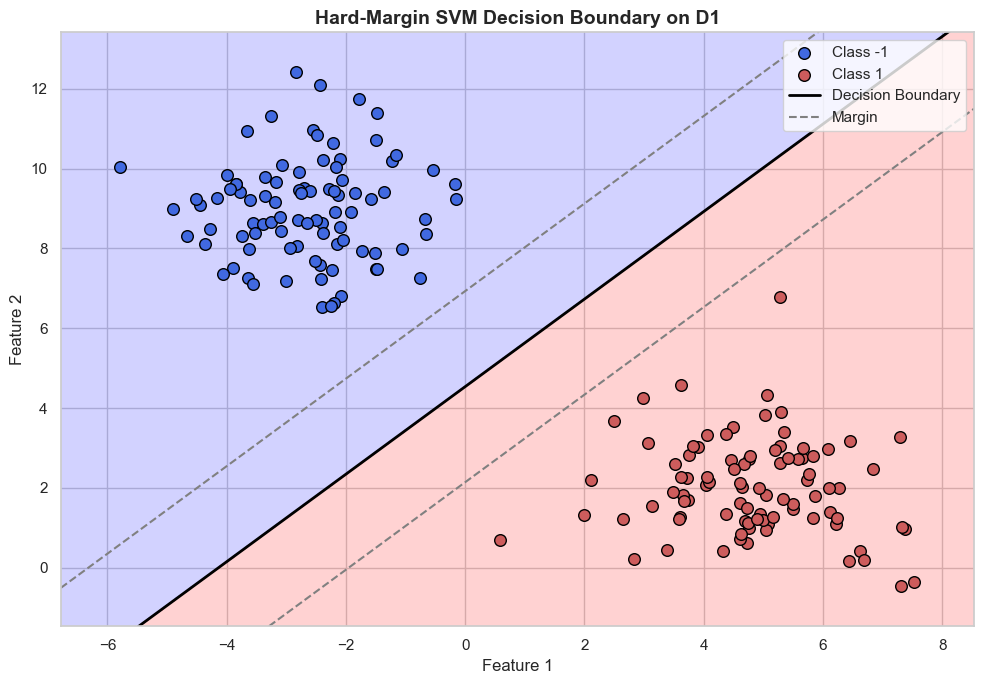

In [654]:
# Visualize the decision boundary for the trained hard-margin SVM on D1
plot_svm_decision_boundary(
    svm_model=model,
    X=X1_train,
    y=y1_train_svm,
    title="Hard-Margin SVM Decision Boundary on D1"
)

### Soft-Margin SVM on Non-Linearly Separable Data (D2)

In this section, a soft-margin SVM is trained on the non-linearly separable dataset D2.  
The regularization parameter `C=1.0` allows some margin violations to handle overlap between classes.

In [655]:
# Retrieve D2 and T2 datasets
X2_train, y2_train = datasets["D2"]
X2_test, y2_test = datasets["T2"]

# Convert labels from {0, 1} to {-1, 1} for SVM compatibility
y2_train_svm = np.where(y2_train == 0, -1, 1)
y2_test_svm = np.where(y2_test == 0, -1, 1)

# Initialize and train soft-margin SVM (lower C encourages margin violations)
soft_model = SVM(C=1.0)
soft_model.fit(X2_train, y2_train_svm)

# Evaluate on test set T2
accuracy = soft_model.score(X2_test, y2_test_svm)
print("Test Accuracy on T2 (Soft-margin SVM):", accuracy)

# Print confusion matrix and classification report
y2_pred = soft_model.predict(X2_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y2_test_svm, y2_pred))

print("\nClassification Report:")
print(classification_report(y2_test_svm, y2_pred, target_names=["Class -1", "Class 1"]))

Test Accuracy on T2 (Soft-margin SVM): 0.85

Confusion Matrix:
[[8 2]
 [1 9]]

Classification Report:
              precision    recall  f1-score   support

    Class -1       0.89      0.80      0.84        10
     Class 1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



### Decision Boundary Visualization for D2 (Soft-Margin SVM)

The following plot shows the decision boundary learned by the soft-margin SVM  
on the non-linearly separable dataset D2.

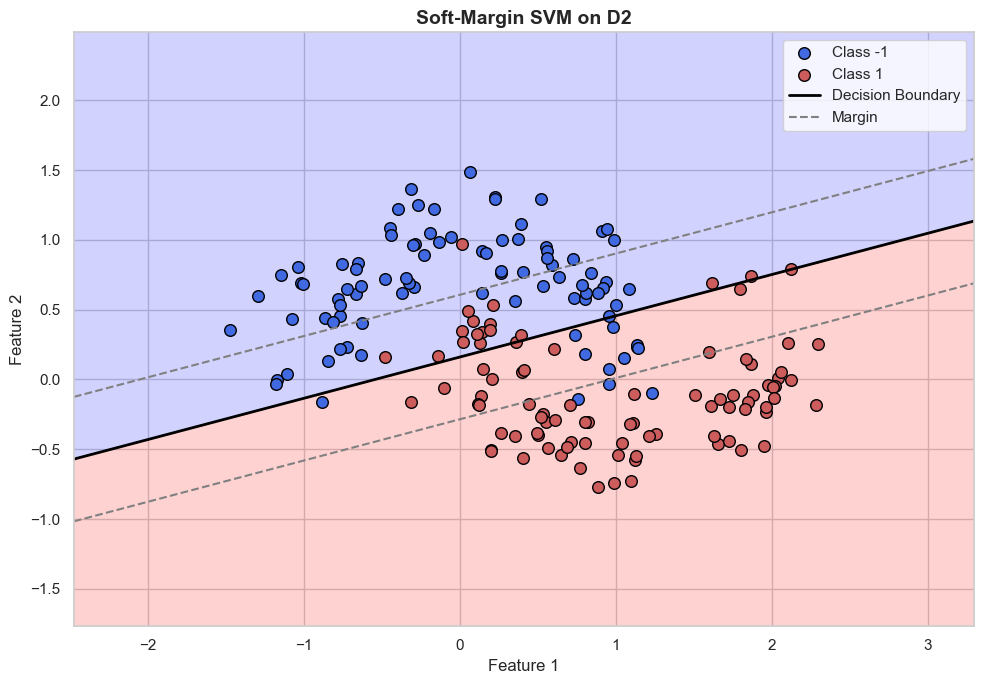

In [656]:
# Plot for D2 with trained soft-margin SVM
plot_svm_decision_boundary(
    svm_model=soft_model,
    X=X2_train,
    y=y2_train_svm,
    title="Soft-Margin SVM on D2"
)

### MLP Classification on Linearly Separable Data (D1)

A Multi-Layer Perceptron (MLP) is trained on the D1 dataset using two hidden layers.  
Input features are standardized and class labels are one-hot encoded to fit the softmax output.  
The model is then evaluated on the test set T1.

In [657]:
# Set seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Load the dataset
X1_train, y1_train = datasets["D1"]
X1_test, y1_test = datasets["T1"]

# Normalize the input features
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y1_train_oh = encoder.fit_transform(y1_train.reshape(-1, 1))

In [658]:
mlp_model = MultiLayerPerceptron(
    input_size=2,
    hidden_sizes=[8,4],
    output_size=2,
    activation='relu',
    output_activation='softmax',
    learning_rate=0.5,
    random_state=42
)

# Train the model
losses = mlp_model.fit(
    X1_train,
    y1_train_oh,
    epochs=100,
    batch_size=None,  # Full-batch gradient descent
    verbose=True
)

# Make predictions
y1_pred_test = mlp_model.predict(X1_test)

# Evaluation
print("MLP Test Accuracy on T1:", accuracy_score(y1_test, y1_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y1_test, y1_pred_test))
print("\nClassification Report:")
print(classification_report(y1_test, y1_pred_test, target_names=["Class -1", "Class 1"]))
print("Predicted class distribution:", np.bincount(y1_pred_test))

Epoch   5/100 — loss: 0.0567
Epoch  10/100 — loss: 0.0169
Epoch  15/100 — loss: 0.0093
Epoch  20/100 — loss: 0.0062
Epoch  25/100 — loss: 0.0046
Epoch  30/100 — loss: 0.0036
Epoch  35/100 — loss: 0.0030
Epoch  40/100 — loss: 0.0025
Epoch  45/100 — loss: 0.0021
Epoch  50/100 — loss: 0.0019
Epoch  55/100 — loss: 0.0017
Epoch  60/100 — loss: 0.0015
Epoch  65/100 — loss: 0.0014
Epoch  70/100 — loss: 0.0012
Epoch  75/100 — loss: 0.0011
Epoch  80/100 — loss: 0.0011
Epoch  85/100 — loss: 0.0010
Epoch  90/100 — loss: 0.0009
Epoch  95/100 — loss: 0.0009
Epoch 100/100 — loss: 0.0008
MLP Test Accuracy on T1: 1.0
Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

    Class -1       1.00      1.00      1.00        10
     Class 1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Pre

### Visualization of MLP Decision Boundary on D1

The following function plots the decision boundary learned by the trained MLP on the linearly separable dataset D1.  
It uses a meshgrid to visualize how the model classifies regions in the feature space.

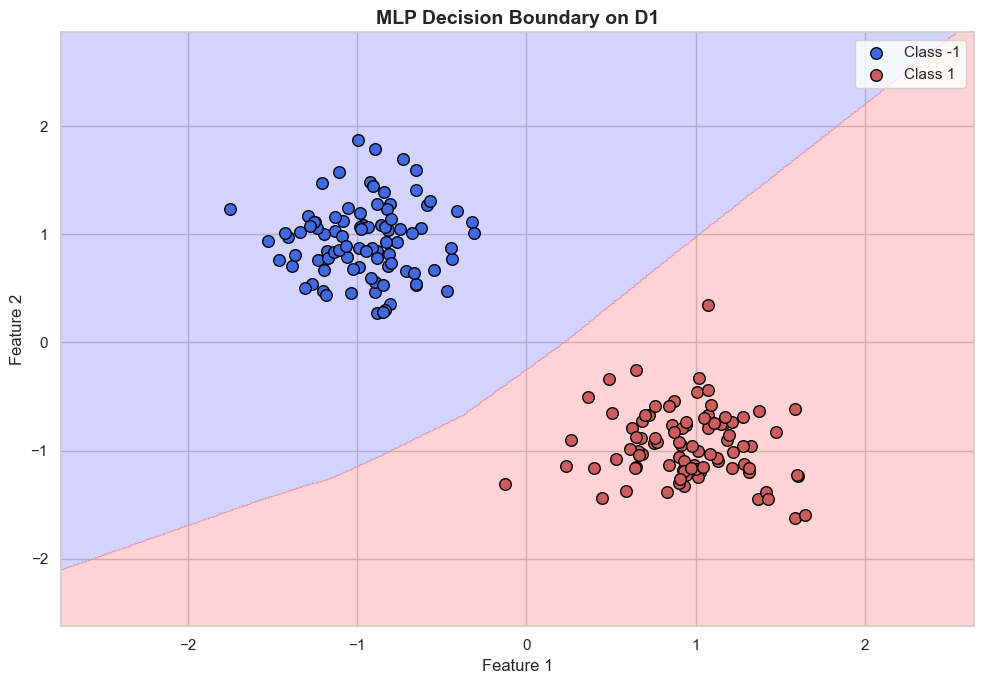

In [659]:
def plot_mlp_decision_boundary(mlp_model, X, y, title="MLP Decision Boundary on D1"):
    """
    Visualize decision boundary learned by a trained MLP.
    
    Parameters
    ----------
    mlp_model : MLP
        Trained MLP model (must have predict method).
    X : np.ndarray
        Feature matrix of shape (n_samples, 2).
    y : np.ndarray
        Class labels (0 or 1).
    title : str
        Plot title.
    """
    # Create a meshgrid over the feature space
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict class labels for each point in the mesh
    Z = mlp_model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1],
                color='royalblue', edgecolor='black', label="Class -1", s=70)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1],
                color='indianred', edgecolor='black', label="Class 1", s=70)

    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title, fontsize=14, weight='bold')
    plt.legend(loc="upper right", fontsize=11)
    plt.tight_layout()
    plt.show()

# Display
plot_mlp_decision_boundary(mlp_model, X1_train, y1_train)

### MLP Classification on Non-linearly Separable Data (D2)

This section applies a custom Multi-Layer Perceptron (MLP) to the non-linearly separable dataset D2.  
The features are normalized and labels are one-hot encoded for softmax output.  
The model is trained using full-batch gradient descent and evaluated on the test set T2.

In [660]:
# Fix the randomness for reproducibility
np.random.seed(42)
random.seed(42)

# Load D2 and T2 data
X2_train, y2_train = datasets["D2"]
X2_test, y2_test = datasets["T2"]

# Normalize the features (very important for MLP training)
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

# One-hot encode the target labels for softmax output
encoder = OneHotEncoder(sparse_output=False)
y2_train_oh = encoder.fit_transform(y2_train.reshape(-1, 1))

# Initialize the MLP model for binary classification
mlp_model = MultiLayerPerceptron(
    input_size=2,               # D2 is 2D
    hidden_sizes=[8, 4],        # Two hidden layers
    output_size=2,              # Binary classification → one-hot
    activation='relu',          # ReLU activation for hidden layers
    output_activation='softmax',# Softmax for multi-class (even though it's 2-class)
    learning_rate=0.5         # Learning rate
)

# Train the model on D2
losses = mlp_model.fit(
    X2_train,
    y2_train_oh,
    epochs=200,
    batch_size=None,            # Full batch gradient descent
    verbose=True
)

# Predict on T2
y2_pred_test = mlp_model.predict(X2_test)

# Evaluate the results
print("MLP Test Accuracy on T2:", accuracy_score(y2_test, y2_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred_test))
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred_test, target_names=["Class -1", "Class 1"]))
print("Predicted class distribution:", np.bincount(y2_pred_test))

Epoch   5/200 — loss: 0.3692
Epoch  10/200 — loss: 0.3329
Epoch  15/200 — loss: 0.3213
Epoch  20/200 — loss: 0.3128
Epoch  25/200 — loss: 0.3063
Epoch  30/200 — loss: 0.3012
Epoch  35/200 — loss: 0.2960
Epoch  40/200 — loss: 0.2910
Epoch  45/200 — loss: 0.2852
Epoch  50/200 — loss: 0.2797
Epoch  55/200 — loss: 0.2747
Epoch  60/200 — loss: 0.2698
Epoch  65/200 — loss: 0.2650
Epoch  70/200 — loss: 0.2605
Epoch  75/200 — loss: 0.2557
Epoch  80/200 — loss: 0.2505
Epoch  85/200 — loss: 0.2445
Epoch  90/200 — loss: 0.2388
Epoch  95/200 — loss: 0.2338
Epoch 100/200 — loss: 0.2285
Epoch 105/200 — loss: 0.2235
Epoch 110/200 — loss: 0.2178
Epoch 115/200 — loss: 0.2125
Epoch 120/200 — loss: 0.2074
Epoch 125/200 — loss: 0.2029
Epoch 130/200 — loss: 0.1985
Epoch 135/200 — loss: 0.1938
Epoch 140/200 — loss: 0.1884
Epoch 145/200 — loss: 0.1820
Epoch 150/200 — loss: 0.1733
Epoch 155/200 — loss: 0.1630
Epoch 160/200 — loss: 0.1523
Epoch 165/200 — loss: 0.1418
Epoch 170/200 — loss: 0.1306
Epoch 175/200 

### Decision Boundary Visualization for MLP on D2

The decision boundary learned by the trained MLP model is visualized over the D2 training set.  
Each region corresponds to a predicted class, and data points are shown with distinct colors based on their true labels.

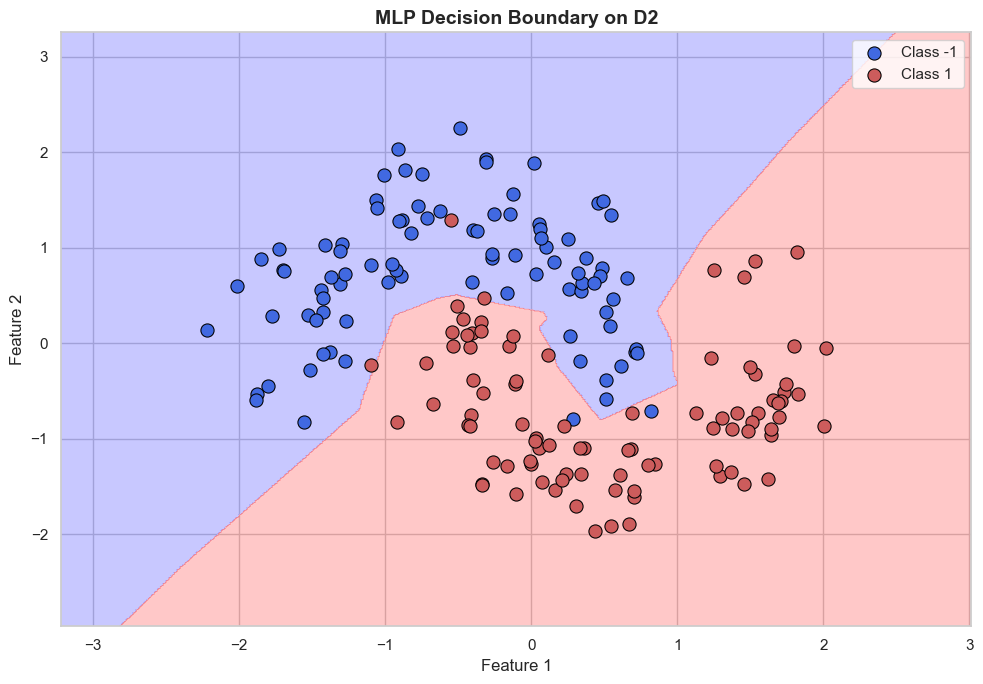

In [661]:
def plot_mlp_decision_boundary(model, X, y, title="MLP Decision Boundary"):
    """
    Visualizes decision boundary and training/test points for an MLP model.

    Parameters
    ----------
    model : Trained MLP model (with .predict method)
    X : np.ndarray
        Feature matrix of shape (n_samples, 2)
    y : np.ndarray
        Class labels (0 or 1)
    title : str
        Plot title
    """
    # Create meshgrid over the feature space
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict labels for each point in the mesh
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.25)

    # Plot actual data points with seaborn
    sns.scatterplot(x=X[y == 0][:, 0], y=X[y == 0][:, 1],
                    color='royalblue', edgecolor='black', s=90, label='Class -1')

    sns.scatterplot(x=X[y == 1][:, 0], y=X[y == 1][:, 1],
                    color='indianred', edgecolor='black', s=90, label='Class 1')

    # Axis settings
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title, fontsize=14, weight='bold')
    plt.legend(loc="upper right", fontsize=11)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_mlp_decision_boundary(mlp_model, X2_train, y2_train, title="MLP Decision Boundary on D2")